# Learning analysis

In [2]:
import pandas as pd
import seaborn as sb
import os
import math
from matplotlib import pyplot as plt
import scipy
import pingouin as pg
import scipy.stats as stats
import statsmodels
import numpy as np
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import binom_test
from analysis_helpers import *
from  matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
import pingouin as pg
import scipy
from scipy import stats
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

sb.set(font_scale=2)
sb.set_style("white")

In [3]:
learning_data = os.listdir('exp7_data')
learning_data = [x for x in learning_data if 'LEARNING.csv' in x]

In [4]:
data = []

path = 'exp7_data'

for x in learning_data:
    data.append(pd.read_csv(path+'/'+x))

data = pd.concat(data)

In [5]:
data_corr = data[data['correct'].notna()]

In [6]:
data_corr['Block Number'] = [
                      1,1,1,1,1,1,1,1,1,1,
                     2,2,2,2,2,2,2,2,2,2,
                     3,3,3,3,3,3,3,3,3,3,
                     4,4,4,4,4,4,4,4,4,4,
                     5,5,5,5,5,5,5,5,5,5,
                     6,6,6,6,6,6,6,6,6,6,
7,7,7,7,7,7,7,7,7,7]*len(data['ID'].unique())
data_corr['Trial Number'] = list(range(0,70))*len(data['ID'].unique())

In [7]:
data_corr['Correct Trials'] = np.nan
data_corr.loc[data_corr['correct']==True,'Correct Trials']=1
data_corr.loc[data_corr['correct']==False,'Correct Trials']=0
data_corr['Proportion Correct'] = data_corr['Correct Trials']/10

In [8]:
grp = data_corr.groupby(['ID','Block Number'], as_index=False).sum()

### Figure 4

Plot proportion correct by block number

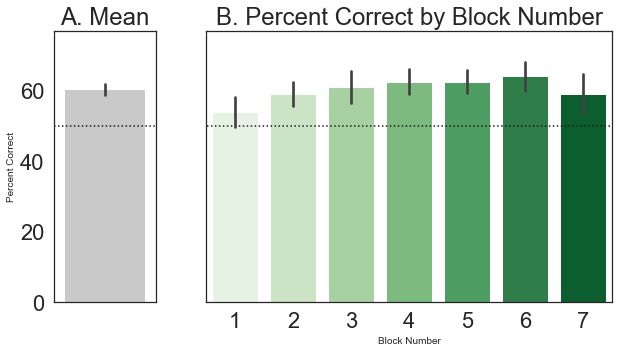

In [9]:
# MAKE SUBPLOTS      
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[1, 4]}, figsize=(10,5))

# SET STANDARD Y AXIS VALUES
y_ax = (0,77)

# PREP DATA (PROPORTION --> PERCENTAGE)
grp['Percent Correct'] = grp['Proportion Correct']*100


# SUBPLOT 1 ################

# horizontal lines
ax1.hlines(50, -.5, 4.5, colors='k', linestyles='dotted')

# barplot (blockwise)
ax1 = sb.barplot(y='Percent Correct', data=grp, ax=ax1, edgecolor="White", facecolor=(.3,.3,.3,.3),
                errorbar='se') #color='Gray', 

# titles and labeling
ax1.set_title("A. Mean")
ax1.set_ylim(y_ax)



# SUBPLOT 2 ################

# horizontal lines
ax2.hlines(50, -.56, 7, colors='k', linestyles='dotted')  

# barplot (mean)
ax2 = sb.barplot(x='Block Number', y='Percent Correct', data=grp, palette='Greens',
                errorbar='se')#.set(title='Learning Experiment, Image')

# titles and labeling
ax2.set_title("B. Percent Correct by Block Number")
ax2.set(ylabel='');
ax2.set_ylim(y_ax)
ax2.set(yticklabels=[])



# SHOW THE PLOT ############
plt.savefig('figures/learning.pdf', bbox_inches='tight')
plt.show()


In [10]:
for x in range(1,8):
    
    print('BIN '+str(x)+' ------------------------------------')
    print('Mean: '+str(np.mean(grp[grp['Block Number']==x]['Percent Correct'])))
    print('Standard error: '+str(scipy.stats.sem(grp[grp['Block Number']==x]['Percent Correct'])))
    print(stats.ttest_1samp(a=list(grp[grp['Block Number']==x]['Percent Correct']), popmean=50))
    print()


BIN 1 ------------------------------------
Mean: 54.0
Standard error: 4.255027985559524
TtestResult(statistic=0.9400643223910574, pvalue=0.35898337240929146, df=19)

BIN 2 ------------------------------------
Mean: 59.0
Standard error: 3.3950428258673973
TtestResult(statistic=2.6509238503348174, pvalue=0.015769586469413212, df=19)

BIN 3 ------------------------------------
Mean: 61.0
Standard error: 4.46624768917406
TtestResult(statistic=2.4629175911276477, pvalue=0.02350368749035825, df=19)

BIN 4 ------------------------------------
Mean: 62.5
Standard error: 3.618301433429489
TtestResult(statistic=3.454659660058306, pvalue=0.0026547455283750655, df=19)

BIN 5 ------------------------------------
Mean: 62.5
Standard error: 3.3146405695434242
TtestResult(statistic=3.7711479533727585, pvalue=0.0012921085380986678, df=19)

BIN 6 ------------------------------------
Mean: 64.0
Standard error: 4.129483209670111
TtestResult(statistic=3.390254733864968, pvalue=0.00307141528034234, df=19)

